## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note that there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

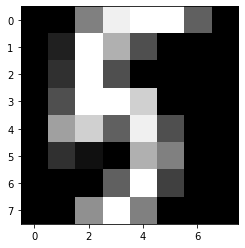

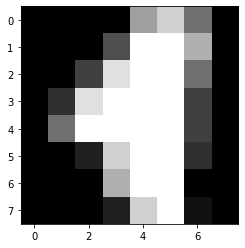

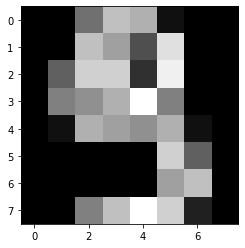

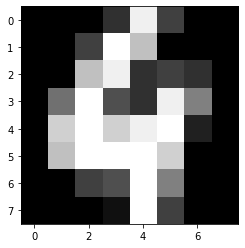

In [8]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

### Neural Net

In [10]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 8.42 s
Wall time: 3.09 s


In [11]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 20.2 ms


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       0.97      1.00      0.99        36
           3       0.95      0.98      0.96        41
           4       0.95      0.97      0.96        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       0.97      0.95      0.96        37
           8       0.96      0.93      0.95        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## With RandomizedSearchCV

In [13]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
rand_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best accuracy score is 0.9805144212156407
... with parameters: {'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (70,), 'alpha': 0.5, 'activation': 'tanh'}
CPU times: total: 19.2 s
Wall time: 8min 7s


In [14]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.93      0.96        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

CPU times: total: 15.6 ms
Wall time: 12 ms


## With GridSearchCV

In [17]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'learning_rate_init': [0.001, 0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
The best accuracy score is 0.9812161246612467
... with parameters: {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (90,), 'learning_rate': 'constant', 'learning_rate_init': 0.005, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 14 s
Wall time: 13min 5s


In [18]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

CPU times: total: 46.9 ms
Wall time: 17.8 ms


### Fit a SVM classification model using Random Search for Linear kernel

In [26]:
from sklearn.svm import SVC


score_measure = "accuracy"
kfolds = 5

param_grid = {
     'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000], 
    'kernel': ['linear']
}

rand_linear_SVC = SVC()
rand_search = RandomizedSearchCV(estimator = rand_linear_SVC, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestPrecisionTree = rand_search.best_estimator_

C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=500. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits
The best accuracy score is 0.9812161246612467
... with parameters: {'kernel': 'linear', 'C': 0.001}


In [27]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.94      0.91      0.93        35
           2       0.84      0.89      0.86        36
           3       0.94      0.76      0.84        41
           4       0.80      0.95      0.87        38
           5       0.83      0.97      0.89        30
           6       1.00      0.97      0.99        37
           7       0.97      0.81      0.88        37
           8       1.00      0.79      0.88        29
           9       0.75      0.88      0.81        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360

CPU times: total: 0 ns
Wall time: 7.63 ms


### Fit a SVM classification model using Grid Search for Linear kernel

In [28]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
     'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000], 
    'kernel': ['linear']
}

Grid_Linear_SVC = SVC()
grid_search = GridSearchCV(estimator = Grid_Linear_SVC, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestPrecisionTree = grid_search.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
The best accuracy score is 0.9812161246612467
... with parameters: {'C': 0.001, 'kernel': 'linear'}


In [29]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.94      0.91      0.93        35
           2       0.84      0.89      0.86        36
           3       0.94      0.76      0.84        41
           4       0.80      0.95      0.87        38
           5       0.83      0.97      0.89        30
           6       1.00      0.97      0.99        37
           7       0.97      0.81      0.88        37
           8       1.00      0.79      0.88        29
           9       0.75      0.88      0.81        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360

CPU times: total: 0 ns
Wall time: 6 ms


### Fit a SVM classification model using Random Search for Poly kernel

In [30]:
score_measure = "accuracy"
kfolds = 10

param_grid = {
     'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['poly']
}

Random_Poly_SVC = SVC()
rand_search = RandomizedSearchCV(estimator = Random_Poly_SVC, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestPrecisionTree = rand_search.best_estimator_

C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=500. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 16 candidates, totalling 160 fits
The best accuracy score is 0.9895687645687646
... with parameters: {'kernel': 'poly', 'gamma': 1, 'C': 0.1}


In [31]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.94      0.91      0.93        35
           2       0.84      0.89      0.86        36
           3       0.94      0.76      0.84        41
           4       0.80      0.95      0.87        38
           5       0.83      0.97      0.89        30
           6       1.00      0.97      0.99        37
           7       0.97      0.81      0.88        37
           8       1.00      0.79      0.88        29
           9       0.75      0.88      0.81        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360

CPU times: total: 0 ns
Wall time: 14.1 ms


### Fit a SVM classification model using Grid Search for Poly kernel

In [38]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
     'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['poly']
}


Grid_Poly_SVC = SVC()
grid_search = GridSearchCV(estimator = Grid_Poly_SVC, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestPrecisionTree = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best accuracy score is 0.987485481997677
... with parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [33]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.94      0.91      0.93        35
           2       0.84      0.89      0.86        36
           3       0.94      0.76      0.84        41
           4       0.80      0.95      0.87        38
           5       0.83      0.97      0.89        30
           6       1.00      0.97      0.99        37
           7       0.97      0.81      0.88        37
           8       1.00      0.79      0.88        29
           9       0.75      0.88      0.81        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360

CPU times: total: 0 ns
Wall time: 13.6 ms


### Fit a SVM classification model using Random Search for RBF kernel

In [34]:
score_measure = "accuracy"
kfolds = 10

param_grid = {
     'C': [0.1,1, 10], 
    'gamma': [1,0.1,0.011],
    'kernel': ['rbf']
}

Random_rbf_SVC = SVC()
rand_search = RandomizedSearchCV(estimator = Random_rbf_SVC, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestPrecisionTree = rand_search.best_estimator_

C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=500. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits
The best accuracy score is 0.751544289044289
... with parameters: {'kernel': 'rbf', 'gamma': 0.011, 'C': 10}


In [35]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.94      0.91      0.93        35
           2       0.84      0.89      0.86        36
           3       0.94      0.76      0.84        41
           4       0.80      0.95      0.87        38
           5       0.83      0.97      0.89        30
           6       1.00      0.97      0.99        37
           7       0.97      0.81      0.88        37
           8       1.00      0.79      0.88        29
           9       0.75      0.88      0.81        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360

CPU times: total: 0 ns
Wall time: 10 ms


### Fit a SVM classification model using Grid Search for rbf kernel

In [36]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
grid_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best accuracy score is 0.8392736159504451
... with parameters: {'min_samples_split': 3, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0021, 'max_leaf_nodes': 72, 'max_depth': 11, 'criterion': 'entropy'}


C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Srinidhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or 

In [37]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.91      0.91      0.91        35
           2       0.87      0.92      0.89        36
           3       0.78      0.85      0.81        41
           4       0.92      0.95      0.94        38
           5       0.79      0.87      0.83        30
           6       1.00      0.97      0.99        37
           7       0.97      0.81      0.88        37
           8       1.00      0.76      0.86        29
           9       0.81      0.88      0.85        34

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360

CPU times: total: 0 ns
Wall time: 6.03 ms


## Inference:

If we are to predict based on the accuracy alone, we see that the accuracy is more for the Poly Kernel under SVM. But if we are to predict based on the f1 score which tends to be a better metric for uneven data, we see an avg f1 score for the Neural Networks when I consider tuning the parameters for the Grid search with exhausting searching is 98% which is better than any other model. The SVM tends to average with its performance metrics at the overall 89%. This is because the SVM works best with the smaller number of features which are already distinct in nature. Where as the Neural Networks tend to be more adaptive for the classification and image recognition. It can work and learn from the multi layered dimensions and can also classify them into their respective distinct groups which the SVM can't. Hence it is generally more feasible to use this kind of a model over the SVM for such problems.